Чигладзе Нодар.ДЗ по линеной регрессии.Солнечная радиация.

сначала надо импортировать все библиотеки


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

теперь импортируем и изучим датасет.

In [ ]:
data = pd.read_csv("/content/SolarPrediction.csv")
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


Видим что пропусков нету.Это хорошо.

Посмотрим на матрицу корреляций чтобы понять от каких переменных больше всего зависит "Radiation"

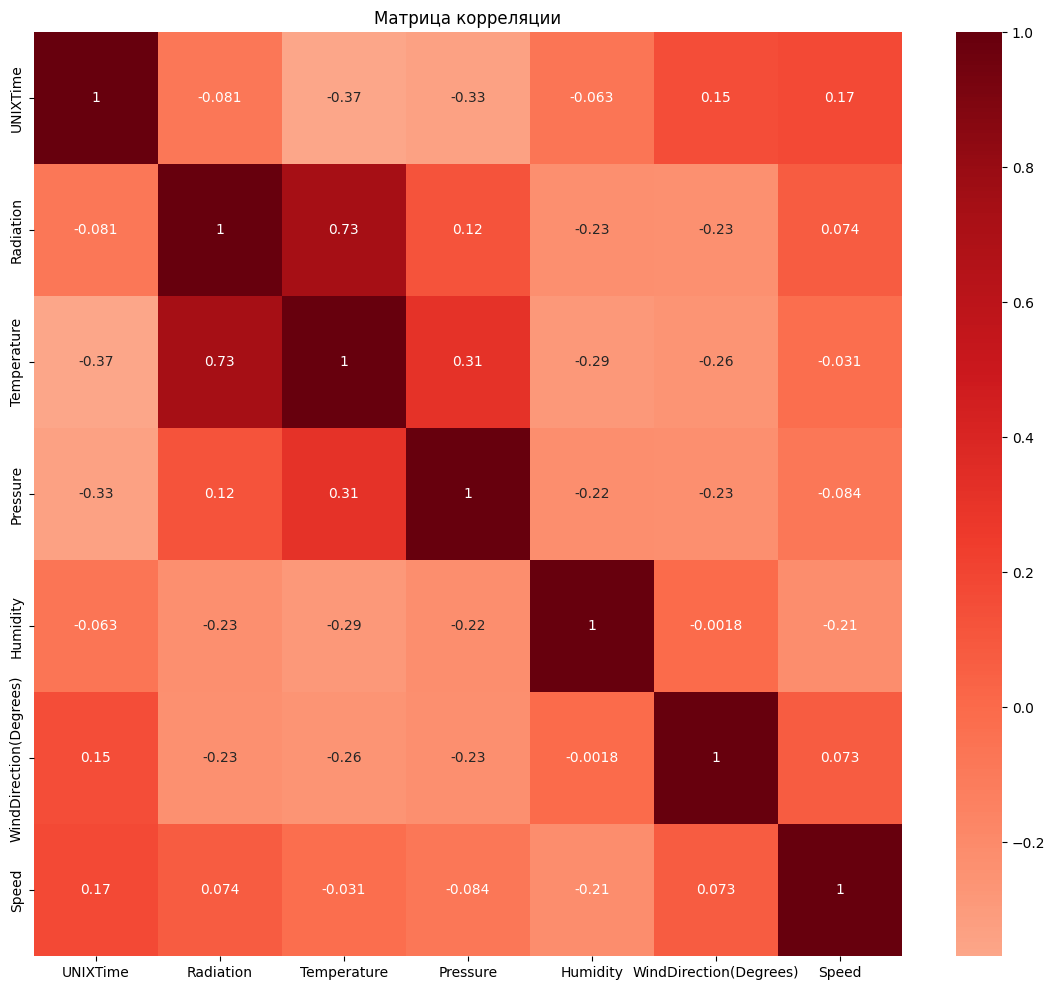

In [ ]:
plt.figure(figsize=(14,12))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='Reds', center=0, annot=True)
plt.title("Матрица корреляции")
plt.show()

Понимаем что больше всего зависит от Temperature.

Теперь надо разделить данные на те котороые нужны для обучения и тестовые данные.И обучить модель .

In [ ]:
X = data.loc[:, ['Temperature', 'Humidity']]
y = data['Radiation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Визуализация

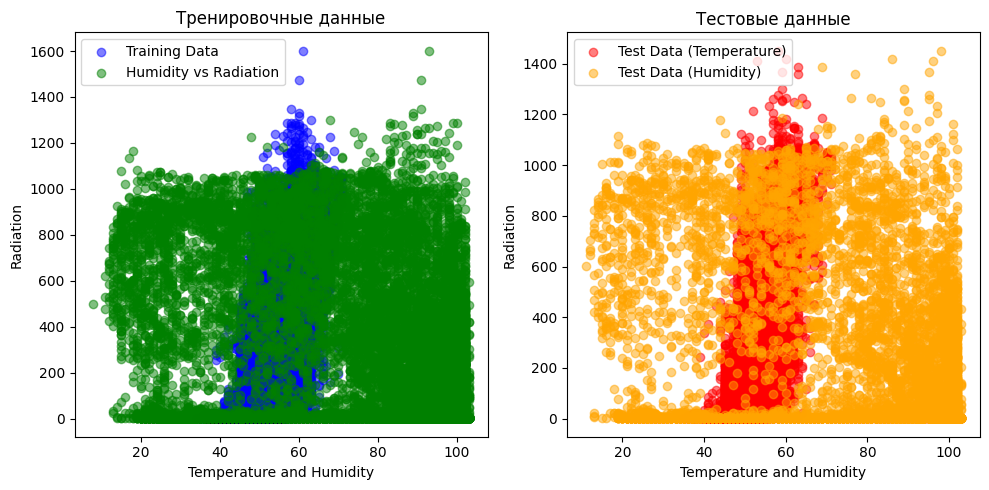

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(X_train['Temperature'], y_train, label='Training Data', color='blue', alpha=0.5)
axes[0].scatter(X_train['Humidity'], y_train, label='Humidity vs Radiation', color='green', alpha=0.5)
axes[0].set_title('Тренировочные данные')
axes[0].set_xlabel('Temperature and Humidity')
axes[0].set_ylabel('Radiation')
axes[0].legend()


axes[1].scatter(X_test['Temperature'], y_test, label='Test Data (Temperature)', color='red', alpha=0.5)
axes[1].scatter(X_test['Humidity'], y_test, label='Test Data (Humidity)', color='orange', alpha=0.5)
axes[1].set_title('Тестовые данные')
axes[1].set_xlabel('Temperature and Humidity')
axes[1].set_ylabel('Radiation')
axes[1].legend()

plt.tight_layout()
plt.show()

Создание и обучение модели

In [ ]:
lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)
w0 = lig_reg.intercept_
w0

-1664.8567596029047

In [ ]:
w1 = lig_reg.coef_
w1

array([36.95330669, -0.23311084])

In [ ]:
y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 164.41449242033553
Mean Squared Error: 46605.66619550656
R2 score: 0.5432825782487692


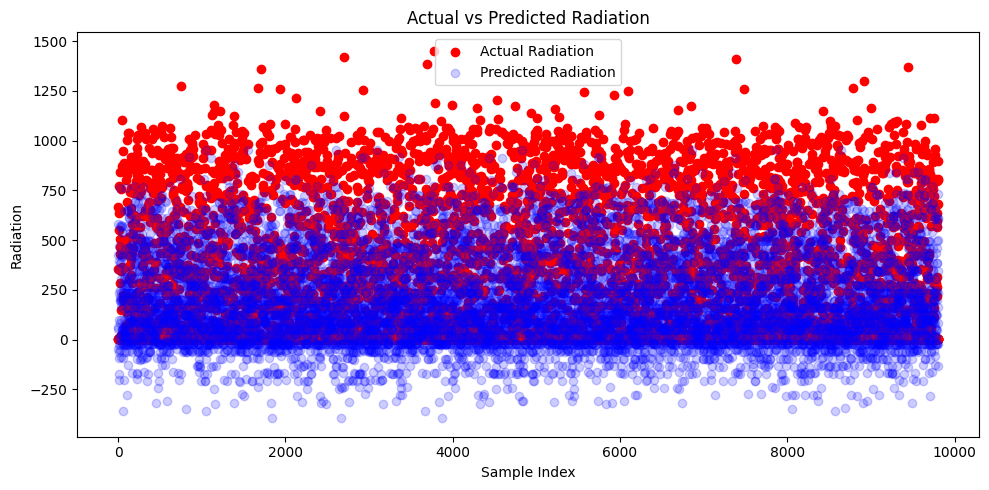

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(range(len(y_test)), y_test, label='Actual Radiation', color='red', alpha=1)

plt.scatter(range(len(y_pred)), y_pred, label='Predicted Radiation', color='blue', alpha=0.2)

plt.title('Actual vs Predicted Radiation')
plt.xlabel('Sample Index')
plt.ylabel('Radiation')
plt.legend()

plt.tight_layout()
plt.show()

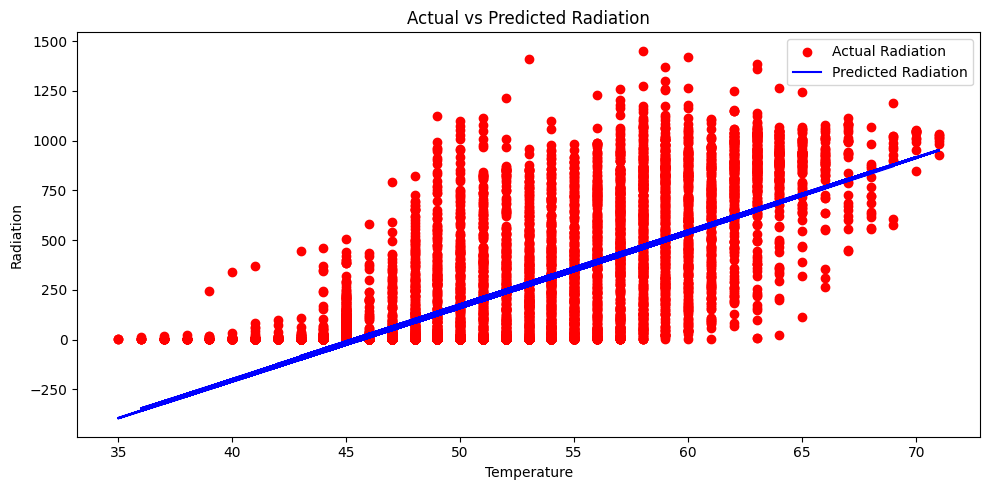

In [ ]:
plt.figure(figsize=(10, 5))


plt.scatter(X_test['Temperature'], y_test, label='Actual Radiation', color='red')


plt.plot(X_test['Temperature'], y_pred, color='blue', label='Predicted Radiation')


plt.title('Actual vs Predicted Radiation')
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.legend()


plt.tight_layout()
plt.show()